In [1]:
import numpy as np
import matplotlib.pyplot as plt

(array([ 1.,  0., 18., 11.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-197. , -124.1,  -51.2,   21.7,   94.6,  167.5,  240.4,  313.3,
         386.2,  459.1,  532. ]),
 <BarContainer object of 10 artists>)

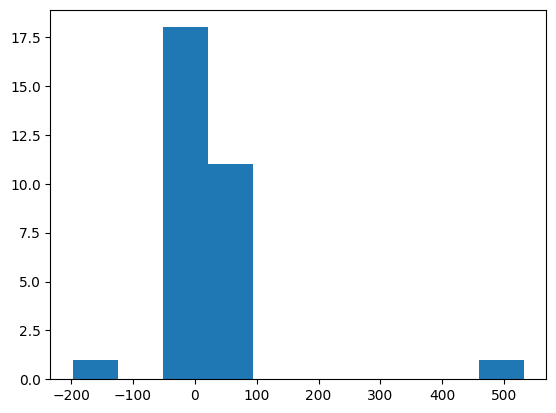

In [17]:
dataset = [11,10,12,14,12,23,22,53,21,53,-197,532,62,11,21,64,73,12,1,1,1,2,2,35,63,63,7,-22,35,4,15]
len(dataset)
plt.hist(dataset)

### To Calcualte Outliere By using Z-Score Method

In [18]:
def detect_outliers(data):
    # Accoring 3rd standard deviation we can detect the outliers 
    threshold = 3

    # To Create empthy dataset for storing outliers
    outliers = []
    # To calculate mean
    mean = np.mean(data)

    # To calculate Standard Deviation
    std = np.std(data)

    for i in data:
        # Z-Score Formula : (Data_Point-Mean)/Standard_Deviation
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [19]:
# Z-Score Method
detect_outliers(dataset)

[532]

### To Calculate Outlier By using IQR Method
* Sort the dataset
* Calcualate Q1(25%) and Q3(75%)
* IQR(Q3-Q1)
* Find the Lower Fence(Q1-1.3(IQR))
* Find the Upper Fence(Q3-1.3(IQR))

In [24]:
# Sort the dataset accending order
dataset = sorted(dataset)
print(dataset)

[-197, -22, 1, 1, 1, 2, 2, 4, 7, 10, 11, 11, 12, 12, 12, 14, 15, 21, 21, 22, 23, 35, 35, 53, 53, 62, 63, 63, 64, 73, 532]


In [33]:
# q1 = np.percentile(dataset,[25])
# q3 = np.percentile(dataset,[75])
# print(q1,q3)

# OR

q1,q3 = np.percentile(dataset,[25,75])
print(q1,q3)

5.5 44.0


In [35]:
# IQR
iqr = q3-q1
print(iqr)

38.5


In [38]:
lower_fence = q1-(1.5*iqr)
upper_fence = q3+(1.5*iqr)
print(lower_fence,upper_fence)

-52.25 101.75


In [39]:
for i in dataset:
    if i<=lower_fence and i<=upper_fence:
        print(i,end=" ")

-197 